# Libraries and versions

In [1]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.3
import numpy as np #version 1.19.2
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
import datetime

#sklearn for ML model
from sklearn import __version__ as skl #version 0.24.1
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#lightgbm for ML model
from lightgbm import  __version__ as lgbm, LGBMRegressor #version 3.1.1

#for visualizing Errors
from yellowbrick import __version__ as ylwb#version 1.3.post1
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')
print(f'Sklearn version - {skl}')
print(f'YellowBrick version - {ylwb}')
print(f'LightLGBM version - {lgbm}')

Python version - 3.7.9
Pandas version - 1.2.3
Numpy version - 1.19.2
Seaborn version - 0.11.0
Matplotlib version - 3.3.3
Sklearn version - 0.24.1
YellowBrick version - 1.3.post1
LightLGBM version - 3.1.1


# Configurations

## Seaborn

In [3]:
sns.set_palette('nipy_spectral')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None):
    graphic_object.figure.set_size_inches(18,6)
    graphic_object.set_title(title, color='grey', fontsize=22)
    graphic_object.set_xlabel(xlabel, color='grey', fontsize=18)
    graphic_object.set_ylabel(ylabel, color='grey', fontsize=18)
    graphic_object = graphic_object

## Warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [5]:
dataset = pd.read_csv('BTC-USD (1).csv')

## Dataset infos

In [6]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2401 non-null   object 
 1   Open       2397 non-null   float64
 2   High       2397 non-null   float64
 3   Low        2397 non-null   float64
 4   Close      2397 non-null   float64
 5   Adj Close  2397 non-null   float64
 6   Volume     2397 non-null   float64
dtypes: float64(6), object(1)
memory usage: 131.4+ KB


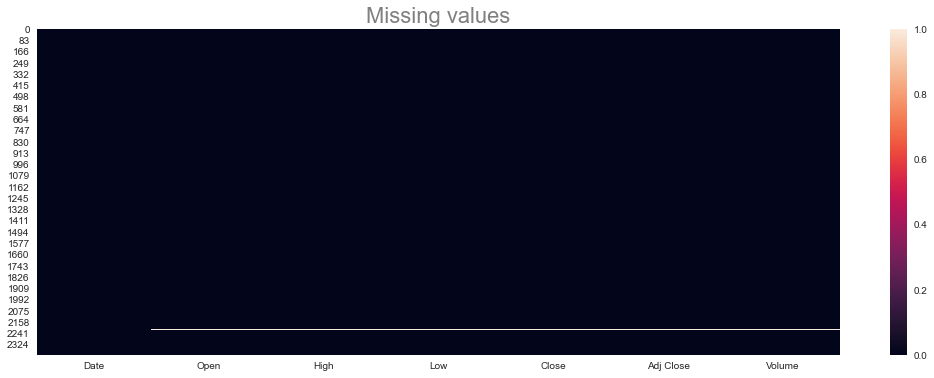

In [8]:
#look for 3 missing values
graphic1 = sns.heatmap(dataset.isnull())
configuration(graphic1, 'Missing values')

In [9]:
lines, columns = dataset.shape
print(f'Dataset has {lines} lines and {columns} columns.')

Dataset has 2401 lines and 7 columns.


## Treating dataset

### change columns names

In [10]:
#create dict with new column names
new_columns = {}
for column in dataset.columns:
    dict_temp = {
        column:column.lower()
    }
    new_columns.update(dict_temp)
dataset.rename(columns=new_columns, inplace=True)
dataset

,date,open,high,low,close,adj close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2396,2021-04-09,58326.562500,58937.046875,57807.863281,58245.003906,58245.003906,4.665521e+10
2397,2021-04-10,58253.777344,61276.664063,58038.707031,59793.234375,59793.234375,5.823847e+10
2398,2021-04-11,59846.230469,60790.554688,59289.796875,60204.964844,60204.964844,4.628025e+10
2399,2021-04-12,60175.945313,61253.035156,59589.875000,59893.453125,59893.453125,5.182869e+10


### Verify variable close and adj close

In [11]:
close = dataset['close'] == dataset['adj close']
close.value_counts()

True     2397
False       4
dtype: int64

- there is only 4 lines which values in 'close' is different for 'adj close'. Because this I will drop this variable.

In [12]:
dataset.drop(columns=['adj close'], inplace=True)
dataset.head()

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


### Column date

#### split variable in year, month and day

In [13]:
#split variable date and create new variables from dataset
dataset['year'] = dataset['date'].str.split('-', n=3, expand=True)[0]
dataset['month'] = dataset['date'].str.split('-', n=3, expand=True)[1]
dataset['day'] = dataset['date'].str.split('-', n=3, expand=True)[2]

In [14]:
dataset.head()

,date,open,high,low,close,volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,09,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,09,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,09,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,09,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,09,21


#### Change variable date to date object

In [15]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2401 non-null   datetime64[ns]
 1   open    2397 non-null   float64       
 2   high    2397 non-null   float64       
 3   low     2397 non-null   float64       
 4   close   2397 non-null   float64       
 5   volume  2397 non-null   float64       
 6   year    2401 non-null   object        
 7   month   2401 non-null   object        
 8   day     2401 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 168.9+ KB


#### Create variable semester, quarter and year_week

In [17]:
semester = {
    '01':1, '02':1, '03':1, '04':1, '05':1, '06':1,
    '07':2, '08':2, '09':2, '10':2, '11':2, '12':2
}
dataset['semester'] = dataset['month'].map(semester)
dataset.head()

,date,open,high,low,close,volume,year,month,day,semester
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,09,17,2
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,09,18,2
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,09,19,2
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,09,20,2
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,09,21,2


In [18]:
quarter = {
    '01':1, '02':1, '03':1,
    '04':2, '05':2, '06':2,
    '07':3, '08':3, '09':3,
    '10':4, '11':4, '12':4
}
dataset['quarter'] = dataset['month'].map(quarter)
dataset.head()

,date,open,high,low,close,volume,year,month,day,semester,quarter
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,09,17,2,3
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,09,18,2,3
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,09,19,2,3
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,09,20,2,3
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,09,21,2,3


In [19]:
year_week = []
for line in range(dataset.shape[0]):
    number_week = dataset['date'][line].isocalendar()[1]
    year_week.append(number_week)

dataset['year_week'] = np.asarray(year_week)
dataset.head()

,date,open,high,low,close,volume,year,month,day,semester,quarter,year_week
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,09,17,2,3,38
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,09,18,2,3,38
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,09,19,2,3,38
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,09,20,2,3,38
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,09,21,2,3,38


### Missing values

In [20]:
selection = dataset['open'].isna()
dataset[selection]
#indexes 2039, 2214, 2217 and 2218 are NaN

,date,open,high,low,close,volume,year,month,day,semester,quarter,year_week
2039,2020-04-17,NaN,NaN,NaN,NaN,NaN,2020,04,17,1,2,16
2214,2020-10-09,NaN,NaN,NaN,NaN,NaN,2020,10,09,2,4,41
2217,2020-10-12,NaN,NaN,NaN,NaN,NaN,2020,10,12,2,4,42
2218,2020-10-13,NaN,NaN,NaN,NaN,NaN,2020,10,13,2,4,42


In [21]:
#change missing values with value before 
dataset.fillna(method='ffill', inplace=True)
#check changes
dataset.iloc[[2039, 2214, 2217, 2218]]

,date,open,high,low,close,volume,year,month,day,semester,quarter,year_week
2039,2020-04-17,6640.454102,7134.450684,6555.504395,7116.804199,4.678324e+10,2020,04,17,1,2,16
2214,2020-10-09,10677.625000,10939.799805,10569.823242,10923.627930,2.196212e+10,2020,10,09,2,4,41
2217,2020-10-12,11296.082031,11428.813477,11288.627930,11384.181641,1.996863e+10,2020,10,12,2,4,42
2218,2020-10-13,11296.082031,11428.813477,11288.627930,11384.181641,1.996863e+10,2020,10,13,2,4,42


## EDA

### Change during time

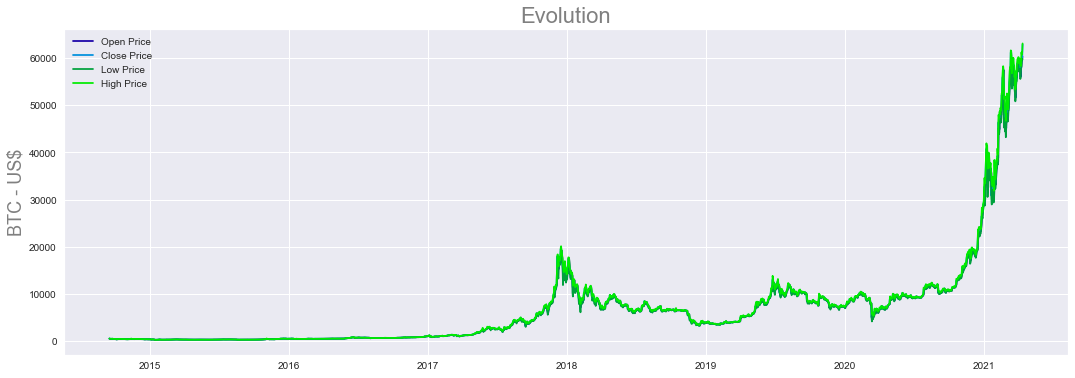

In [22]:
graphic2 = sns.lineplot(x=dataset['date'], y=dataset['open'], label='Open Price')
graphic2 = sns.lineplot(x=dataset['date'], y=dataset['close'], label='Close Price')
graphic2 = sns.lineplot(x=dataset['date'], y=dataset['low'], label='Low Price')
graphic2 = sns.lineplot(x=dataset['date'], y=dataset['high'], label='High Price')
configuration(graphic2, 'Evolution', ylabel='BTC - US$')

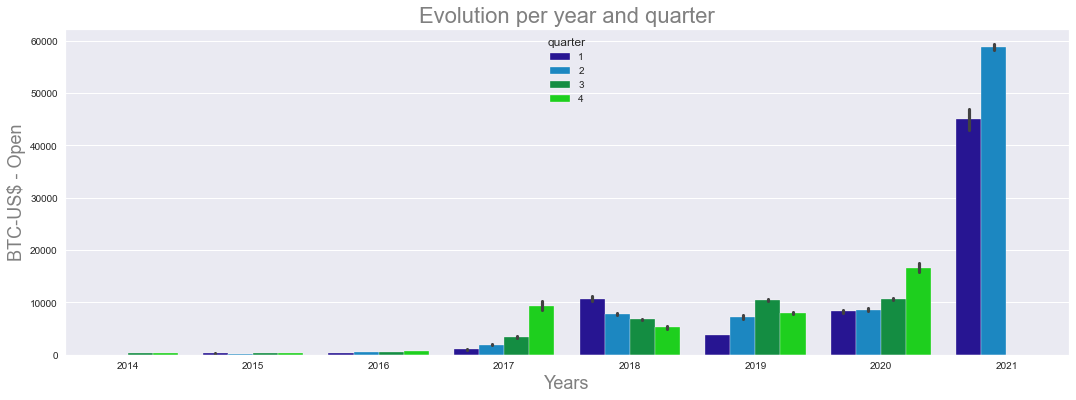

In [23]:
graphic3 = sns.barplot(x=dataset['year'], y=dataset['open'], hue=dataset['quarter'])
configuration(graphic3,title='Evolution per year and quarter', ylabel='BTC-US$ - Open', xlabel='Years')

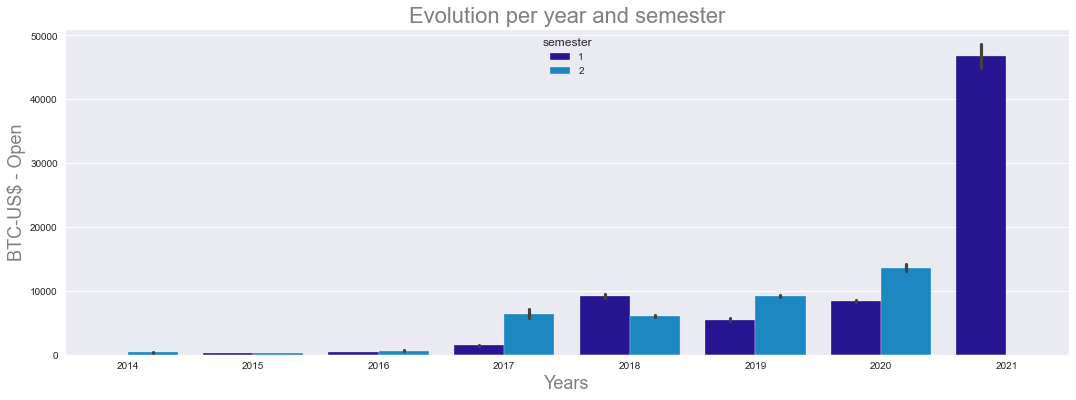

In [24]:
graphic4 = sns.barplot(x=dataset['year'], y=dataset['open'], hue=dataset['semester'])
configuration(graphic4,title='Evolution per year and semester', ylabel='BTC-US$ - Open', xlabel='Years')

- is clearly that stock price before 2017 had little daily, quarter and semester variation
- seems that use data for the years 2014, 2015 and 2016 will not good for modeling algorithm

## Modeling

- target: predict close of stocks with base in open variable
- create variables correlated with open and close

In [25]:
#create variable with difference between open and close
dataset['open_close'] = dataset['close'] - dataset['open']
dataset['high_low'] = dataset['high'] - dataset['low']

#create variable with difference between days
dataset['var_open_close'] = dataset['open_close'].diff()
dataset['var_high_low'] = dataset['high_low'].diff()
dataset['var_open'] = dataset['open'].diff()
dataset['var_close'] = dataset['close'].diff()

#create a statistical variable (rolling mean for 5 days)
dataset['open_rolling_mean'] = dataset['open'].rolling(5).mean()
dataset['close_rolling_mean'] = dataset['close'].rolling(5).mean()

dataset.head(10)

,date,open,high,low,close,volume,year,month,day,semester,quarter,year_week,open_close,high_low,var_open_close,var_high_low,var_open,var_close,open_rolling_mean,close_rolling_mean
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,09,17,2,3,38,-8.529999,15.752014,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,09,18,2,3,38,-32.419983,43.755981,-23.889984,28.003967,-9.004029,-32.894013,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,09,19,2,3,38,-29.307007,43.302978,3.112976,-0.453003,-32.756988,-29.644012,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,09,20,2,3,38,14.230988,33.412994,43.537995,-9.889984,-29.429993,14.108002,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,09,21,2,3,38,-9.263977,19.244995,-23.494965,-14.167999,13.411987,-10.082978,429.916998,416.859003
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600.0,2014,09,22,2,3,39,3.052002,9.785980,12.315979,-9.459015,-8.984985,3.330994,416.564197,405.822601
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500.0,2014,09,23,2,3,39,33.698975,45.360016,30.646973,35.574036,2.992004,33.638977,405.610602,408.092798
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700.0,2014,09,24,2,3,39,-12.546020,14.980011,-46.244995,-30.380005,33.658997,-12.585998,407.940204,413.774597
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400.0,2014,09,25,2,3,39,-11.582001,14.052002,0.964019,-0.928009,-12.595001,-11.630982,413.636804,414.308600
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,21460800.0,2014,09,26,2,3,39,-7.003998,14.928985,4.578003,0.876983,-11.727020,-7.149017,414.305603,415.429395


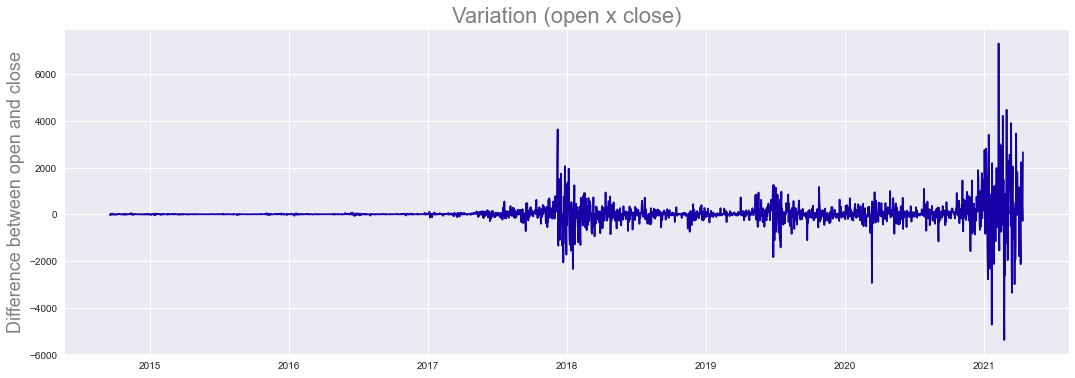

In [26]:
graphic3 = sns.lineplot(x=dataset['date'], y=dataset['open_close'])
configuration(graphic3, 'Variation (open x close)', ylabel='Difference between open and close')

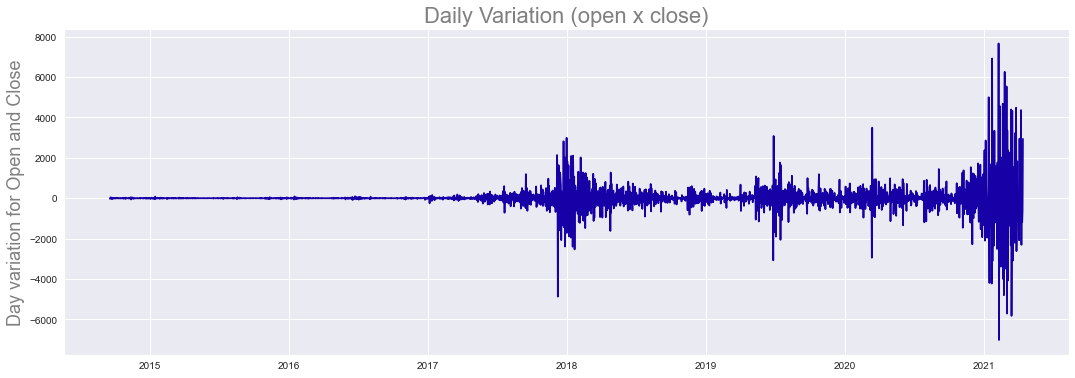

In [27]:
graphic4 = sns.lineplot(x=dataset['date'], y=dataset['var_open_close'])
configuration(graphic4, 'Daily Variation (open x close)', ylabel='Day variation for Open and Close')

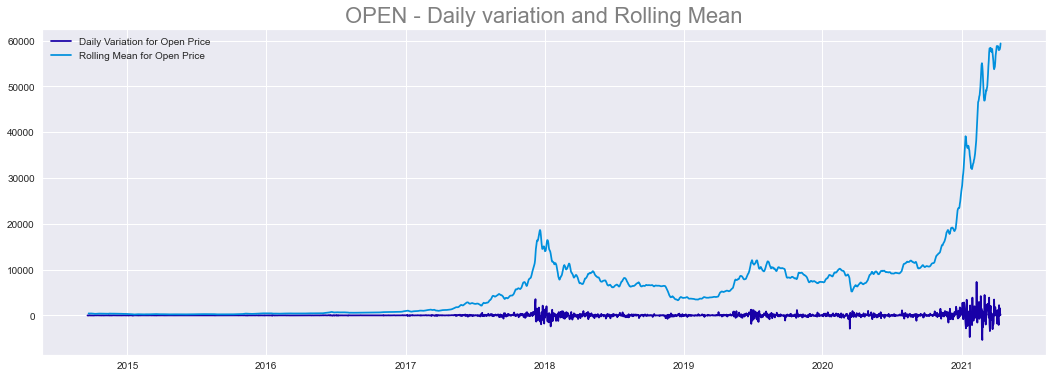

In [28]:
graphic5 = sns.lineplot(x=dataset['date'], y=dataset['var_open'], label='Daily Variation for Open Price')
graphic5 = sns.lineplot(x=dataset['date'], y=dataset['open_rolling_mean'], label='Rolling Mean for Open Price')
configuration(graphic5, title='OPEN - Daily variation and Rolling Mean')

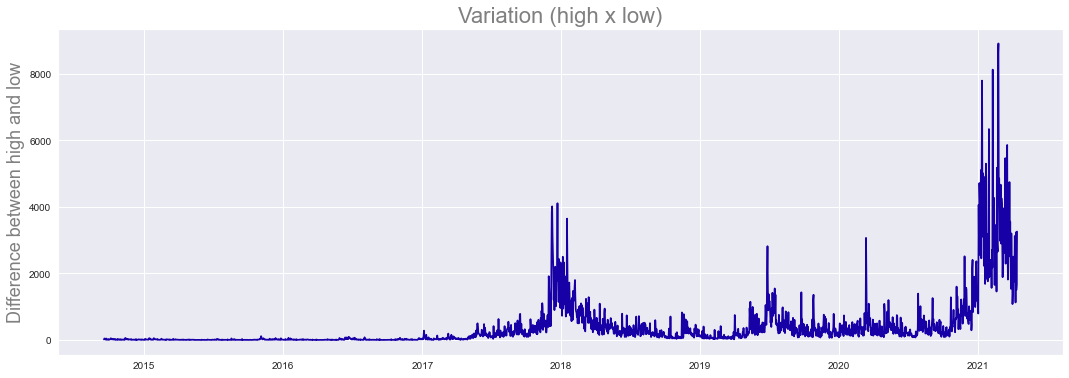

In [29]:
graphic6 = sns.lineplot(x=dataset['date'], y=dataset['high_low'])
configuration(graphic6, 'Variation (high x low)', ylabel='Difference between high and low')

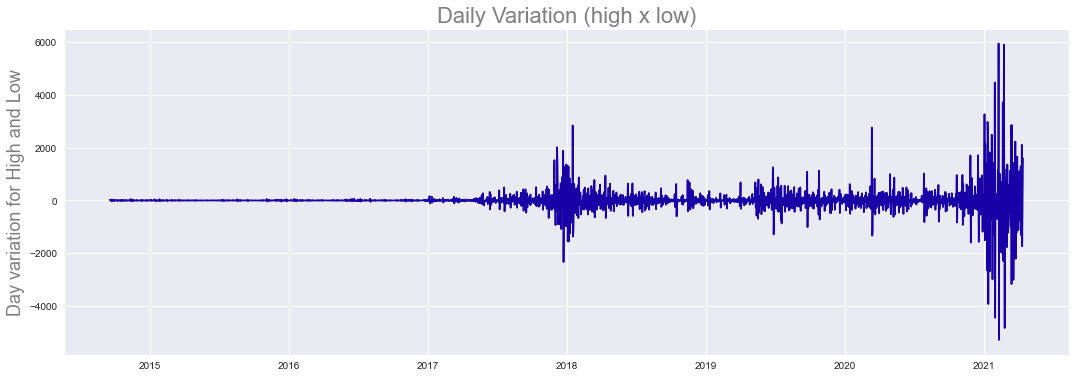

In [30]:
graphic7 = sns.lineplot(x=dataset['date'], y=dataset['var_high_low'])
configuration(graphic7, 'Daily Variation (high x low)', ylabel='Day variation for High and Low')

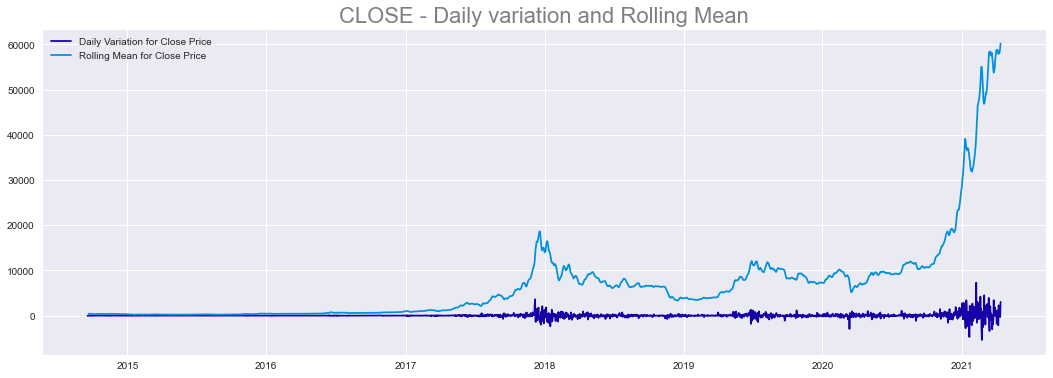

In [31]:
graphic8 = sns.lineplot(x=dataset['date'], y=dataset['var_close'], label='Daily Variation for Close Price')
graphic8 = sns.lineplot(x=dataset['date'], y=dataset['close_rolling_mean'], label='Rolling Mean for Close Price')
configuration(graphic8, title='CLOSE - Daily variation and Rolling Mean')

## Split train and test data

In [32]:
#exclude years 2014, 2015 and 2016
model_dataset = dataset.query('year>="2017"')

#train database is 2017, 2018 and 2019
train_dataset = model_dataset.query('year<="2019"')
X_train = train_dataset.drop(columns=['date', 'year', 'month', 'day', 'semester', 'quarter', 'close'])
y_train = train_dataset['close']

#test database is 2020 and 2021
test_dataset = model_dataset.query('year>="2020"')
X_test = test_dataset.drop(columns=['date','year', 'month', 'day', 'semester', 'quarter', 'close'])
y_test = test_dataset['close']

# AdaBoostRegressor

In [33]:
model_1 = AdaBoostRegressor(n_estimators=200, random_state=666)
model_1.fit(X_train, y_train)
model_1_results = model_1.predict(X_test)

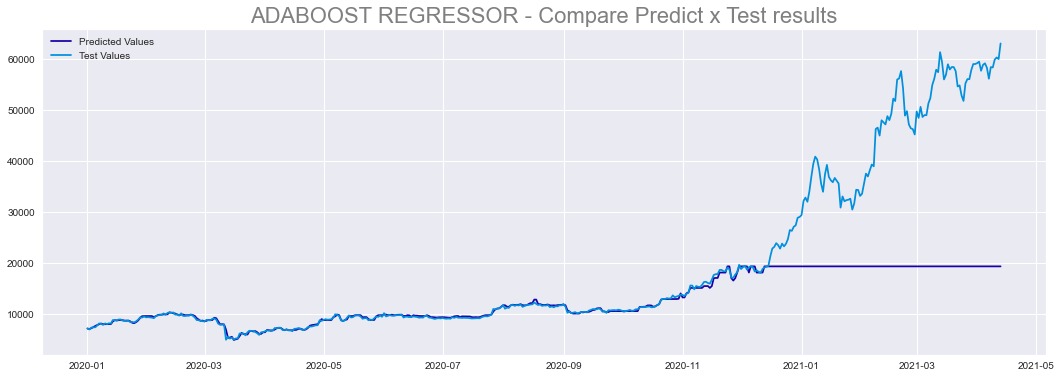

In [34]:
graphic9 = sns.lineplot(x=test_dataset['date'], y=model_1_results, label='Predicted Values')
graphic9 = sns.lineplot(x=test_dataset['date'], y=y_test, label='Test Values')
configuration(graphic9, title='ADABOOST REGRESSOR - Compare Predict x Test results')

# RandomForestRegressor

In [35]:
model_2 = RandomForestRegressor(n_estimators=100, random_state=666)
model_2.fit(X_train, y_train)
model_2_results = model_2.predict(X_test)

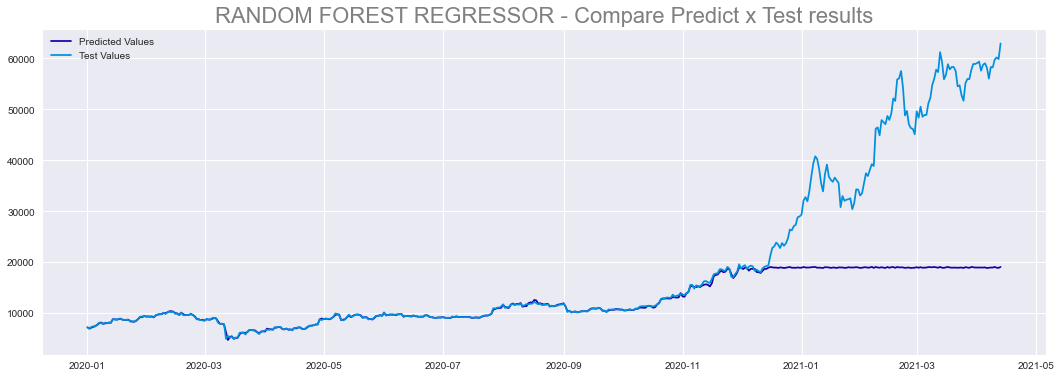

In [36]:
graphic10 = sns.lineplot(x=test_dataset['date'], y=model_2_results, label='Predicted Values')
graphic10 = sns.lineplot(x=test_dataset['date'], y=y_test, label='Test Values')
configuration(graphic10, title='RANDOM FOREST REGRESSOR - Compare Predict x Test results')

# LGBMRegressor

In [37]:
model_10 = LGBMRegressor(n_estimators=100)
model_10.fit(X_train, y_train)
model_10_results = model_10.predict(X_test)

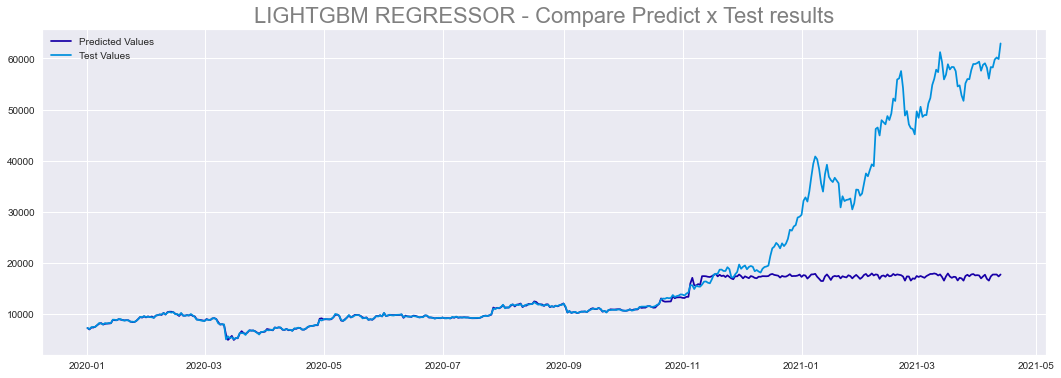

In [38]:
graphic10 = sns.lineplot(x=test_dataset['date'], y=model_10_results, label='Predicted Values')
graphic10 = sns.lineplot(x=test_dataset['date'], y=y_test, label='Test Values')
configuration(graphic10, title='LIGHTGBM REGRESSOR - Compare Predict x Test results')

- the model was unable to predict the large increase to close in the Bitcoin stock market, because the largest open price sample in the train data set was too small than the results presented in 2020 and 2021 

NEXT STEPS

- predict variation and after understand close price
- transform variables in log

## Predict variation for close

### Change X and Y

In [39]:
#train database is 2017, 2018 and 2019
X_train_var = train_dataset.drop(columns=['date', 'year', 'month', 'day', 'semester', 'quarter', 'var_close'])
y_train_var = train_dataset['var_close']

#test database is 2020 and 2021
test_dataset = model_dataset.query('year>="2020"')
X_test_var = test_dataset.drop(columns=['date','year', 'month', 'day', 'semester', 'quarter', 'var_close'])
y_test_var = test_dataset['var_close']

## AdaBoostRegressor

In [40]:
model_3 = AdaBoostRegressor(n_estimators=200, random_state=666)
model_3.fit(X_train_var, y_train_var)
model_3_results = model_3.predict(X_test_var)

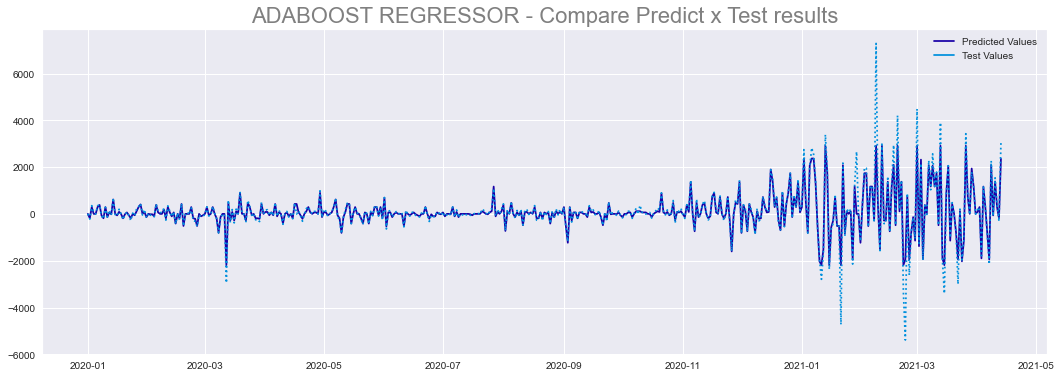

In [41]:
graphic11 = sns.lineplot(x=test_dataset['date'], y=model_3_results, label='Predicted Values')
graphic11 = sns.lineplot(x=test_dataset['date'], y=y_test_var, label='Test Values')
graphic11.lines[1].set_linestyle(':')
configuration(graphic11, title='ADABOOST REGRESSOR - Compare Predict x Test results')

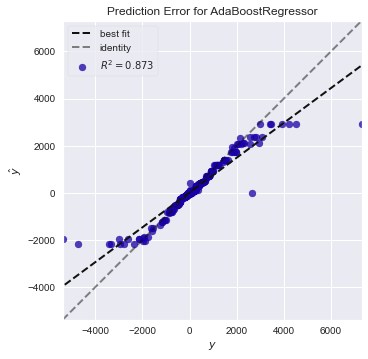

<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
vizualizer = PredictionError(model_3)
vizualizer.fit(X_train_var, y_train_var)
vizualizer.score(X_test_var, y_test_var)
vizualizer.show()

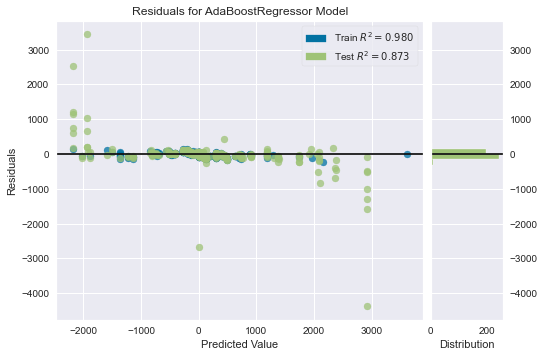

<AxesSubplot:title={'center':'Residuals for AdaBoostRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
vizualizer = ResidualsPlot(model_3)
vizualizer.fit(X_train_var, y_train_var)
vizualizer.score(X_test_var, y_test_var)
vizualizer.show()

## RandomForestRegressor

In [44]:
model_4 = RandomForestRegressor(n_estimators=200, random_state=666)
model_4.fit(X_train_var, y_train_var)
model_4_results = model_4.predict(X_test_var)

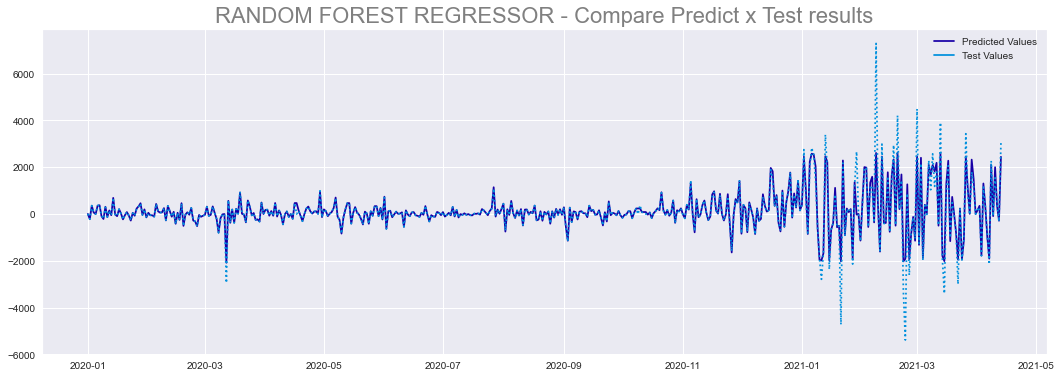

In [45]:
graphic12 = sns.lineplot(x=test_dataset['date'], y=model_4_results, label='Predicted Values')
graphic12 = sns.lineplot(x=test_dataset['date'], y=y_test_var, dashes=True, label='Test Values')
graphic12.lines[1].set_linestyle(':')
configuration(graphic12, title='RANDOM FOREST REGRESSOR - Compare Predict x Test results')

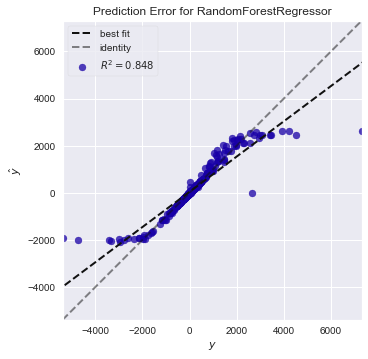

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
vizualizer = PredictionError(model_4)
vizualizer.fit(X_train_var, y_train_var)
vizualizer.score(X_test_var, y_test_var)
vizualizer.show()

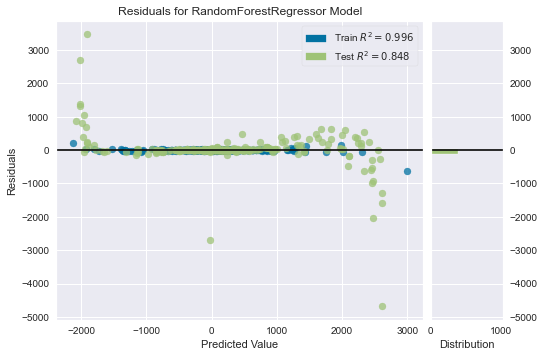

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
vizualizer = ResidualsPlot(model_4)
vizualizer.fit(X_train_var, y_train_var)
vizualizer.score(X_test_var, y_test_var)
vizualizer.show()

## LGBMRegressor

In [48]:
model_11 = LGBMRegressor(n_estimators=200)
model_11.fit(X_train_var, y_train_var)
model_11_results = model_11.predict(X_test_var)

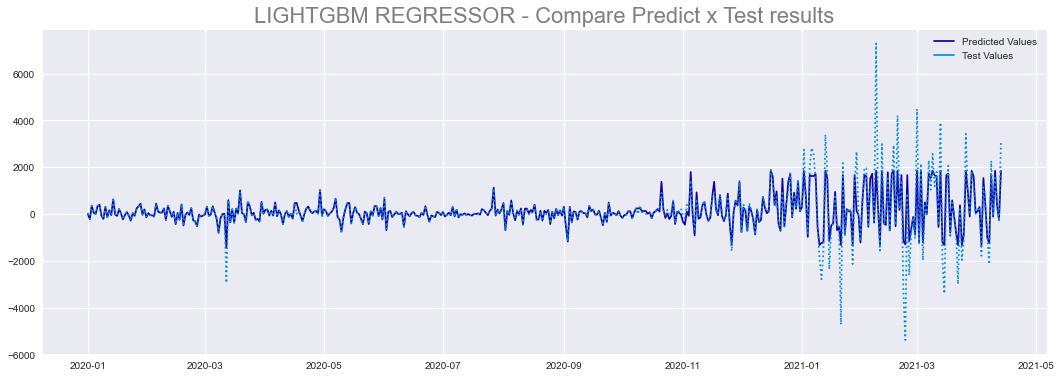

In [49]:
graphic12 = sns.lineplot(x=test_dataset['date'], y=model_11_results, label='Predicted Values')
graphic12 = sns.lineplot(x=test_dataset['date'], y=y_test_var, dashes=True, label='Test Values')
graphic12.lines[1].set_linestyle(':')
configuration(graphic12, title='LIGHTGBM REGRESSOR - Compare Predict x Test results')

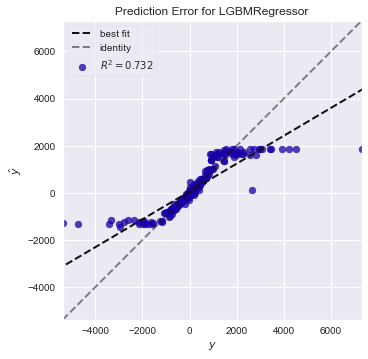

<AxesSubplot:title={'center':'Prediction Error for LGBMRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [50]:
vizualizer = PredictionError(model_11)
vizualizer.fit(X_train_var, y_train_var)
vizualizer.score(X_test_var, y_test_var)
vizualizer.show()

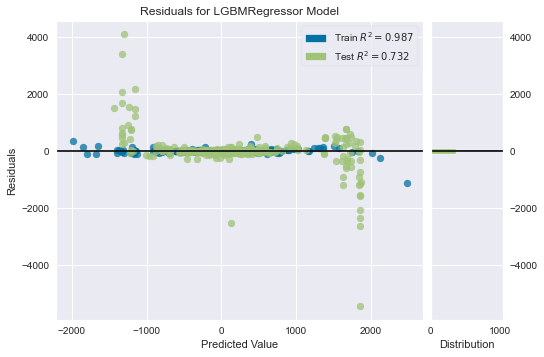

<AxesSubplot:title={'center':'Residuals for LGBMRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
vizualizer = ResidualsPlot(model_11)
vizualizer.fit(X_train_var, y_train_var)
vizualizer.score(X_test_var, y_test_var)
vizualizer.show()

- the model was able to better predict using target variation, but had difficulties with extreme values (above and below)

## Predict using log

In [52]:
#train database is 2017, 2018 and 2019
#there is no log using negative numbers, so all compare variables will be drop
X_train_log = train_dataset.drop(columns=['date', 'year', 'month', 'day', 'semester', 'quarter', 'close', 
                                      'var_open_close', 'var_high_low', 'var_open', 'var_close', 'open_close', 'high_low'])
X_train_log = np.log(X_train_log)

y_train_log = train_dataset['close']
y_train_log = np.log(y_train_log)

#test database is 2020 and 2021
#there is no log using negative numbers, so all compare variables will be drop
X_test_log = test_dataset.drop(columns=['date', 'year', 'month', 'day', 'semester', 'quarter', 'close', 
                                      'var_open_close', 'var_high_low', 'var_open', 'var_close', 'open_close', 'high_low'])
X_test_log = np.log(X_test_log)

y_test_log = test_dataset['close']
y_test_log = np.log(y_test_log)

### Check changes

In [53]:
#Check X_train_log
X_train_log.describe()

,open,high,low,volume,year_week,open_rolling_mean,close_rolling_mean
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,8.540815,8.566724,8.513791,22.198622,3.002309,8.537863,8.539662
std,0.726885,0.728159,0.722606,1.404630,0.892094,0.729307,0.727718
min,6.653093,6.713329,6.627719,17.923950,0.000000,6.695547,6.696240
25%,8.208350,8.229730,8.194109,21.520548,2.564949,8.207291,8.208650
50%,8.776304,8.789895,8.759884,22.391441,3.258097,8.776090,8.776568
75%,9.039629,9.064214,9.011926,23.339008,3.676221,9.038805,9.038213
max,9.876928,9.907928,9.850830,24.532275,3.951244,9.833291,9.833451


In [54]:
#Check y_train_log
y_train_log.describe()

count    1095.000000
mean        8.542595
std         0.725283
min         6.656414
25%         8.208633
50%         8.776534
75%         9.039893
max         9.878036
Name: close, dtype: float64

In [55]:
#Check X_test_log
X_test_log.describe()

,open,high,low,volume,year_week,open_rolling_mean,close_rolling_mean
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,9.576554,9.601353,9.552788,24.285583,2.780538,9.568240,9.572770
std,0.684089,0.688703,0.679618,0.466382,0.976086,0.678117,0.680288
min,8.517709,8.581451,8.320443,23.229004,0.000000,8.558773,8.559150
25%,9.125155,9.136522,9.111491,23.922055,2.197225,9.123042,9.123129
50%,9.282934,9.300056,9.271683,24.284938,2.995732,9.278953,9.281970
75%,9.966854,10.053570,9.963391,24.601830,3.610918,9.882523,9.922524
max,11.022248,11.053313,11.000313,26.583961,3.970292,10.991697,11.005698


In [56]:
#Check y_test_log
y_test_log.describe()

count    469.000000
mean       9.581197
std        0.686337
min        8.511334
25%        9.124893
50%        9.286154
75%       10.034651
max       11.050014
Name: close, dtype: float64

## AdaBoostRegressor

In [57]:
model_5 = AdaBoostRegressor(n_estimators=200, random_state=666)
model_5.fit(X_train_log, y_train_log)
model_5_results = model_5.predict(X_test_log)

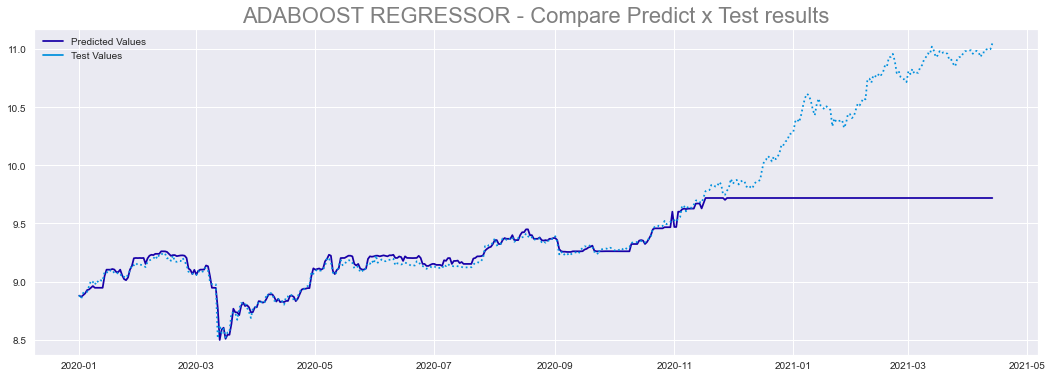

In [58]:
graphic13 = sns.lineplot(x=test_dataset['date'], y=model_5_results, label='Predicted Values')
graphic13 = sns.lineplot(x=test_dataset['date'], y=y_test_log, dashes=True, label='Test Values')
graphic13.lines[1].set_linestyle(':')
configuration(graphic13, title='ADABOOST REGRESSOR - Compare Predict x Test results')

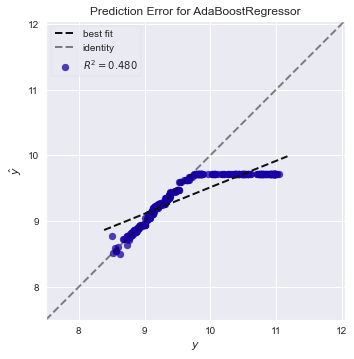

<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [59]:
vizualizer = PredictionError(model_5)
vizualizer.fit(X_train_log, y_train_log)
vizualizer.score(X_test_log, y_test_log)
vizualizer.show()

## RandomForestRegressor

In [60]:
model_6 = RandomForestRegressor(n_estimators=200, random_state=666)
model_6.fit(X_train_log, y_train_log)
model_6_results = model_6.predict(X_test_log)

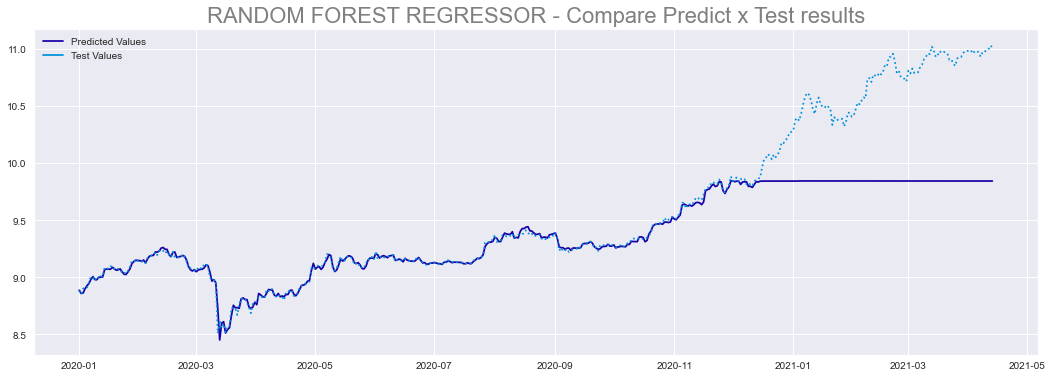

In [61]:
graphic14 = sns.lineplot(x=test_dataset['date'], y=model_6_results, label='Predicted Values')
graphic14 = sns.lineplot(x=test_dataset['date'], y=y_test_log, dashes=True, label='Test Values')
graphic14.lines[1].set_linestyle(':')
configuration(graphic14, title='RANDOM FOREST REGRESSOR - Compare Predict x Test results')

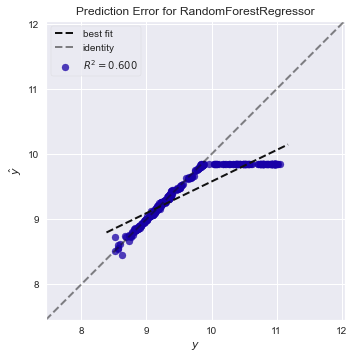

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [62]:
vizualizer = PredictionError(model_6)
vizualizer.fit(X_train_log, y_train_log)
vizualizer.score(X_test_log, y_test_log)
vizualizer.show()

- change variables with log did not solve the problem of overfitting for higher values
- I will try to improve the model's predictions, inserting into the data set the variation of the extreme values (high and low), since these are the points of greatest model error

## Transform dataset

In [63]:
#include new variables
dataset['high_rolling_mean'] = dataset['high'].rolling(5).mean()
dataset['low_rolling_mean'] = dataset['low'].rolling(5).mean()

In [64]:
dataset.head()

,date,open,high,low,close,volume,year,month,day,semester,...,open_close,high_low,var_open_close,var_high_low,var_open,var_close,open_rolling_mean,close_rolling_mean,high_rolling_mean,low_rolling_mean
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,09,17,2,...,-8.529999,15.752014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,09,18,2,...,-32.419983,43.755981,-23.889984,28.003967,-9.004029,-32.894013,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,09,19,2,...,-29.307007,43.302978,3.112976,-0.453003,-32.756988,-29.644012,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,09,20,2,...,14.230988,33.412994,43.537995,-9.889984,-29.429993,14.108002,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,09,21,2,...,-9.263977,19.244995,-23.494965,-14.167999,13.411987,-10.082978,429.916998,416.859003,437.718194,406.624402


### Change X and Y

In [65]:
#exclude years 2014, 2015 and 2016
model_dataset = dataset.query('year>="2017"')

#train database is 2017, 2018 and 2019
train_dataset = model_dataset.query('year<="2019"')
X_train_var_2 = train_dataset.drop(columns=['date', 'year', 'month', 'day', 'semester', 'quarter', 'var_close'])
y_train_var_2 = train_dataset['var_close']

#test database is 2020 and 2021
test_dataset = model_dataset.query('year>="2020"')
X_test_var_2 = test_dataset.drop(columns=['date','year', 'month', 'day', 'semester', 'quarter', 'var_close'])
y_test_var_2 = test_dataset['var_close']

## AdaBoostRegressor

In [66]:
model_7 = AdaBoostRegressor(n_estimators=200, random_state=666)
model_7.fit(X_train_var_2, y_train_var_2)
model_7_results = model_7.predict(X_test_var_2)

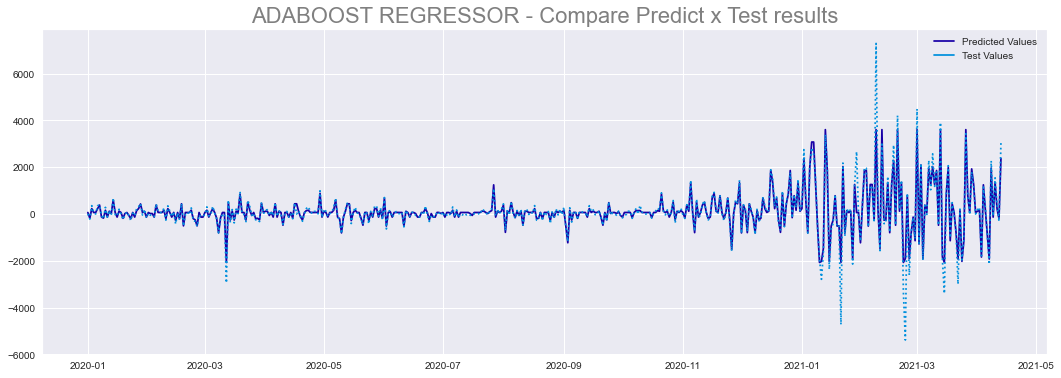

In [67]:
graphic16 = sns.lineplot(x=test_dataset['date'], y=model_7_results, label='Predicted Values')
graphic16 = sns.lineplot(x=test_dataset['date'], y=y_test_var_2, label='Test Values')
graphic16.lines[1].set_linestyle(':')
configuration(graphic16, title='ADABOOST REGRESSOR - Compare Predict x Test results')

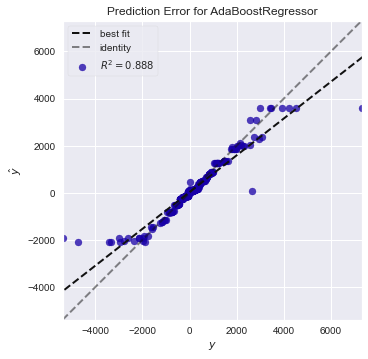

<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [68]:
vizualizer = PredictionError(model_7)
vizualizer.fit(X_train_var_2, y_train_var_2)
vizualizer.score(X_test_var_2, y_test_var_2)
vizualizer.show()

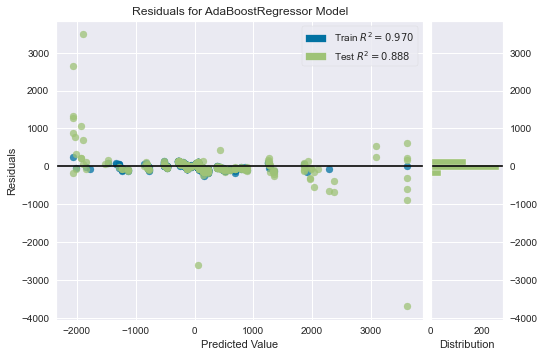

<AxesSubplot:title={'center':'Residuals for AdaBoostRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [69]:
vizualizer = ResidualsPlot(model_7)
vizualizer.fit(X_train_var_2, y_train_var_2)
vizualizer.score(X_test_var_2, y_test_var_2)
vizualizer.show()

In [99]:
mean_squared_error(y_test_var_2, model_7_results, squared=False)

334.056092265307

## RandomForestRegressor

In [70]:
model_8 = RandomForestRegressor(n_estimators=200, random_state=666)
model_8.fit(X_train_var_2, y_train_var_2)
model_8_results = model_8.predict(X_test_var_2)

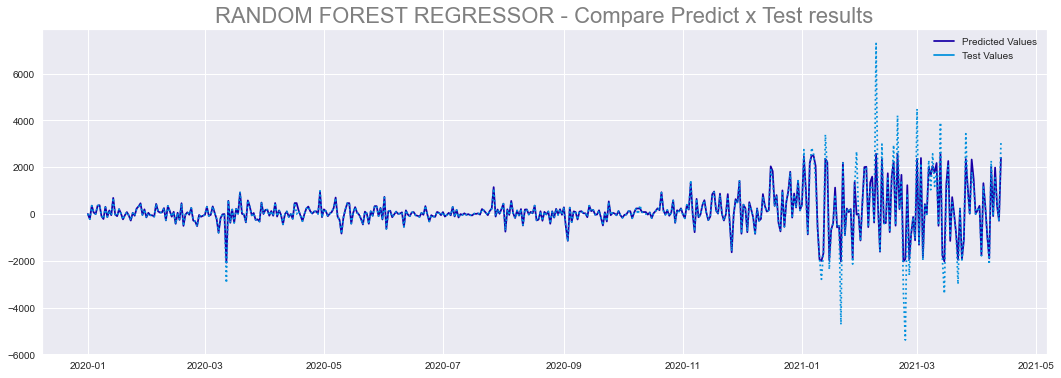

In [71]:
graphic17 = sns.lineplot(x=test_dataset['date'], y=model_8_results, label='Predicted Values')
graphic17 = sns.lineplot(x=test_dataset['date'], y=y_test_var_2, dashes=True, label='Test Values')
graphic17.lines[1].set_linestyle(':')
configuration(graphic17, title='RANDOM FOREST REGRESSOR - Compare Predict x Test results')

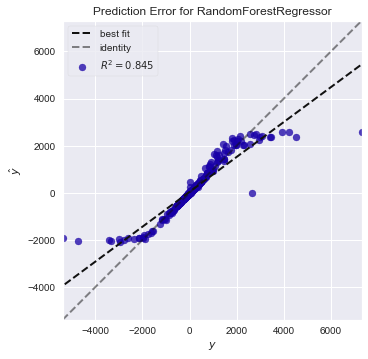

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [72]:
vizualizer = PredictionError(model_8)
vizualizer.fit(X_train_var_2, y_train_var_2)
vizualizer.score(X_test_var_2, y_test_var_2)
vizualizer.show()

- I won't use Random Forest anymore;
- I try make better AdaBoost model, change variables and hiperparams

## AdaBoostRegressor

### Feature importantances for last model using AdaBoost

In [73]:
print('Importance per feature for model_7 (R² = 0.888)')
pd.Series(data=model_7.feature_importances_, index=[X_train_var_2])

Importance per feature for model_7 (R² = 0.888)


open                  0.000000
high                  0.000000
low                   0.000772
close                 0.000259
volume                0.000363
year_week             0.000000
open_close            0.977712
high_low              0.010248
var_open_close        0.000000
var_high_low          0.005716
var_open              0.003403
open_rolling_mean     0.000000
close_rolling_mean    0.000374
high_rolling_mean     0.000388
low_rolling_mean      0.000764
dtype: float64

- work more the variable open_close (the difference between close and open)
- for the next model I will remove all features which have 0 importance

### New features

In [74]:
# rolling mean for open_close
dataset['open_close_rolling_mean'] = dataset['open_close'].rolling(5).mean()

dataset.head()

,date,open,high,low,close,volume,year,month,day,semester,...,high_low,var_open_close,var_high_low,var_open,var_close,open_rolling_mean,close_rolling_mean,high_rolling_mean,low_rolling_mean,open_close_rolling_mean
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,09,17,2,...,15.752014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,09,18,2,...,43.755981,-23.889984,28.003967,-9.004029,-32.894013,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,09,19,2,...,43.302978,3.112976,-0.453003,-32.756988,-29.644012,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,09,20,2,...,33.412994,43.537995,-9.889984,-29.429993,14.108002,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,09,21,2,...,19.244995,-23.494965,-14.167999,13.411987,-10.082978,429.916998,416.859003,437.718194,406.624402,-13.057996


### Change X and Y

In [75]:
#exclude years 2014, 2015 and 2016
model_dataset = dataset.query('year>="2017"')

#train database is 2017, 2018 and 2019
train_dataset = model_dataset.query('year<="2019"')
X_train_var_3 = train_dataset.drop(columns=['date', 'year', 'month', 'day', 'semester', 'quarter', 'var_close',
                                            'open', 'high', 'year_week', 'var_open_close', 'open_rolling_mean'])
y_train_var_3 = train_dataset['var_close']

#test database is 2020 and 2021
test_dataset = model_dataset.query('year>="2020"')
X_test_var_3 = test_dataset.drop(columns=['date', 'year', 'month', 'day', 'semester', 'quarter', 'var_close',
                                          'open', 'high', 'year_week', 'var_open_close', 'open_rolling_mean'])
y_test_var_3 = test_dataset['var_close']

## AdaBoostRegressor

In [76]:
model_9 = AdaBoostRegressor(n_estimators=200, random_state=666)
model_9.fit(X_train_var_3, y_train_var_3)
model_9_results = model_9.predict(X_test_var_3)

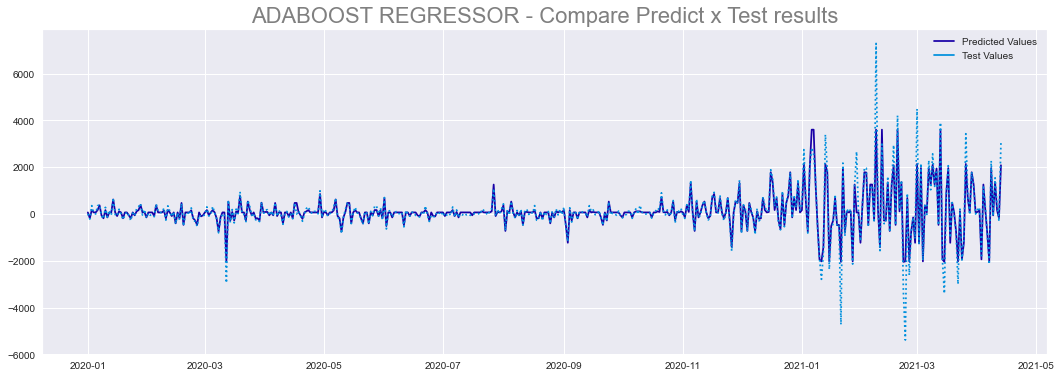

In [77]:
graphic18 = sns.lineplot(x=test_dataset['date'], y=model_9_results, label='Predicted Values')
graphic18 = sns.lineplot(x=test_dataset['date'], y=y_test_var_3, label='Test Values')
graphic18.lines[1].set_linestyle(':')
configuration(graphic18, title='ADABOOST REGRESSOR - Compare Predict x Test results')

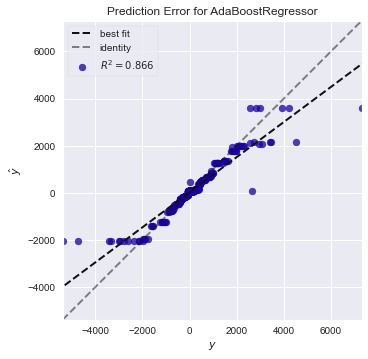

<AxesSubplot:title={'center':'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [78]:
vizualizer = PredictionError(model_9)
vizualizer.fit(X_train_var_3, y_train_var_3)
vizualizer.score(X_test_var_3, y_test_var_3)
vizualizer.show()

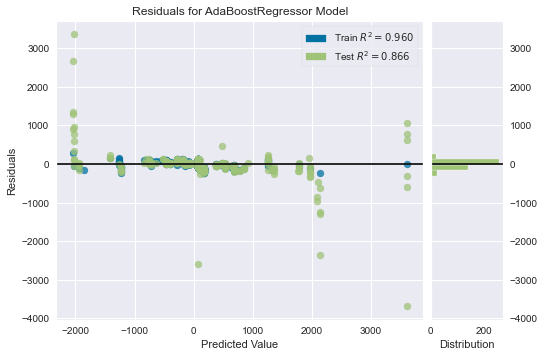

<AxesSubplot:title={'center':'Residuals for AdaBoostRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [79]:
vizualizer = ResidualsPlot(model_9)
vizualizer.fit(X_train_var_3, y_train_var_3)
vizualizer.score(X_test_var_3, y_test_var_3)
vizualizer.show()

In [80]:
print('Importance per feature for model_9 (R² = 0.866)')
pd.Series(data=model_9.feature_importances_, index=[X_train_var_3])

Importance per feature for model_9 (R² = 0.866)


low                        0.000000
close                      0.000998
volume                     0.000000
open_close                 0.966541
high_low                   0.018275
var_high_low               0.000408
var_open                   0.004745
close_rolling_mean         0.000000
high_rolling_mean          0.000000
low_rolling_mean           0.002232
open_close_rolling_mean    0.006801
dtype: float64

## Baseline

### Dummy Regressor

In [81]:
model_dummy = DummyRegressor(strategy='median')
model_dummy.fit(X_train_var_2, y_train_var_2)
model_dummy_results = model_dummy.predict(X_test_var_2)

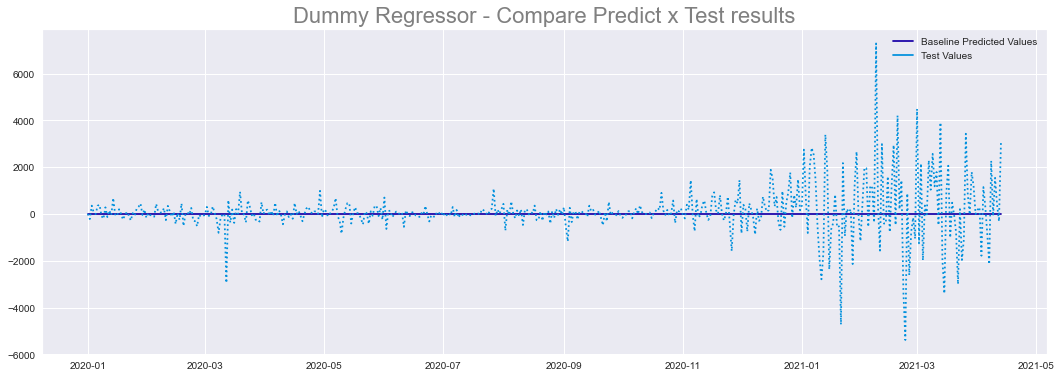

In [82]:
graphic18 = sns.lineplot(x=test_dataset['date'], y=model_dummy_results, label='Baseline Predicted Values')
graphic18 = sns.lineplot(x=test_dataset['date'], y=y_test_var_2, dashes=True, label='Test Values')
graphic18.lines[1].set_linestyle(':')
configuration(graphic18, title='Dummy Regressor - Compare Predict x Test results')

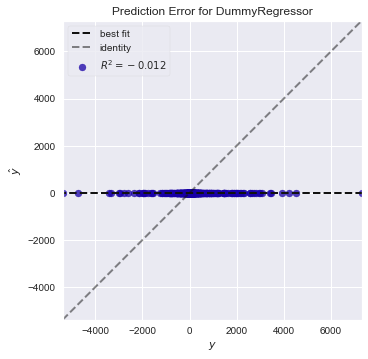

<AxesSubplot:title={'center':'Prediction Error for DummyRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [83]:
vizualizer = PredictionError(model_dummy)
vizualizer.fit(X_train_var_3, y_train_var_3)
vizualizer.score(X_test_var_3, y_test_var_3)
vizualizer.show()

### Rolling Mean for variation of Close

In [84]:
#creating test variables
X_test_baseline = dataset['var_close'].rolling(5).mean()
X_test_baseline = X_test_baseline.iloc[1932:]

y_test_baseline = y_test_var_2

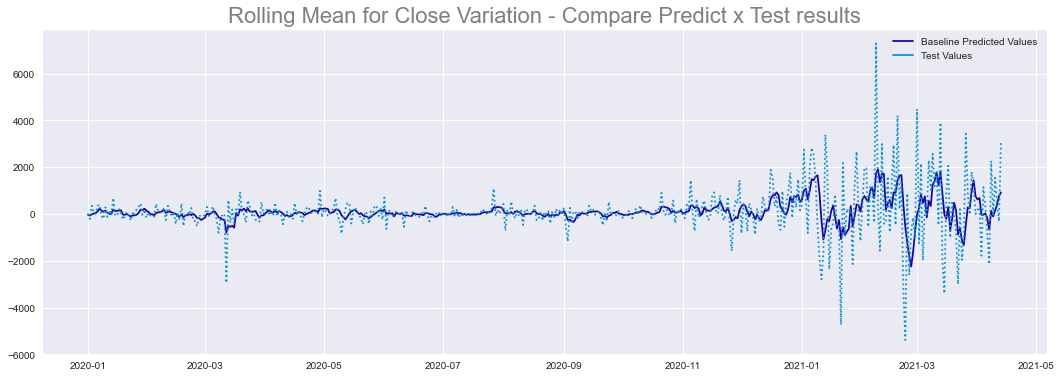

In [85]:
graphic19 = sns.lineplot(x=test_dataset['date'], y=X_test_baseline, label='Baseline Predicted Values')
graphic19 = sns.lineplot(x=test_dataset['date'], y=y_test_baseline, dashes=True, label='Test Values')
graphic19.lines[1].set_linestyle(':')
configuration(graphic19, title='Rolling Mean for Close Variation - Compare Predict x Test results')

### R² Score

In [90]:
r2_score(y_test_baseline, X_test_baseline)

0.21391195280647313

### Mean Squared Error

In [91]:
mean_squared_error(y_test_baseline, X_test_baseline, squared=False)

884.8448492968182

### Mean Absolute Error

In [92]:
mean_absolute_error(y_test_baseline, X_test_baseline)

483.25847005202564

### Mean of y_test

In [93]:
y_test_baseline.mean()

118.87259815565031